In [1]:
import pandas as pd


In [6]:
churnData = pd.read_csv(r)

In [9]:
import numpy as np

In [7]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [40]:
unique_contract_types = churnData['Contract'].unique()

In [45]:
# Crear un diccionario de mapeo
contract_mapping = {
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
}

In [46]:
# Aplicar el mapeo a la columna 'Contract'
churnData['Contract'] = churnData['Contract'].replace(contract_mapping)

In [41]:
unique_contract_types

array([1, 'One year', 'Two year'], dtype=object)

In [47]:
# Verificar los resultados
print(churnData[['Contract']].head())

   Contract
0         1
1        12
2         1
3        12
4         1


In [48]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,1,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,12,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,1,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,12,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,1,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,12,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,12,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,1,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,1,74.40,306.60,Yes


In [49]:
# Convertir 'TotalCharges' a numérico y manejar los valores faltantes
churnData['TotalCharges']  = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))


In [50]:
X = churnData[["tenure","Contract","MonthlyCharges","TotalCharges"]]

In [51]:
y = churnData["Churn"]

In [15]:
from sklearn.pipeline import Pipeline

In [17]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.model_selection import cross_val_score

In [23]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [52]:
# Definir el pipeline para regresión logística
pipeline_lr = Pipeline([
    ('log_reg', LogisticRegression())  # Modelo de regresión logística
])

In [33]:
from imblearn.over_sampling import SMOTE

In [53]:
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
# Aplicar SMOTE para balancear las clases
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_scaled, y)

In [57]:
# Realizar la validación cruzada
scores_lr = cross_val_score(pipeline_lr, X_sm, y_sm, cv=5, scoring='accuracy')
print(f'Regresión Logística - Accuracy: {scores_lr.mean():.4f}')

Regresión Logística - Accuracy: 0.7529


In [58]:
# Definir el pipeline para el árbol de decisión
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de características
    ('decision_tree', DecisionTreeClassifier())  # Clasificador de árbol de decisión
])

# Realizar la validación cruzada
scores_dt = cross_val_score(pipeline_dt, X_sm, y_sm, cv=5, scoring='accuracy')
print(f'Árbol de Decisión - Accuracy: {scores_dt.mean():.4f}')

Árbol de Decisión - Accuracy: 0.7699


In [65]:
from sklearn.datasets import load_iris

In [68]:
iris=load_iris()

In [69]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [71]:
X_sm

array([[-1.27744458, -0.82044365, -1.16032292, -0.99497138],
       [ 0.06632742,  0.33129642, -0.25962894, -0.17387565],
       [-1.23672422, -0.82044365, -0.36266036, -0.96039939],
       ...,
       [ 0.10975655, -0.82044365,  1.13584562,  0.49302855],
       [ 0.34014437,  0.33129642,  1.22643981,  0.83378151],
       [-1.27744458, -0.82044365, -1.48104974, -0.99923217]])

In [ ]:
 feature_names=["tenure","Contract","MonthlyCharges","TotalCharges"], class_names=["Churn"]

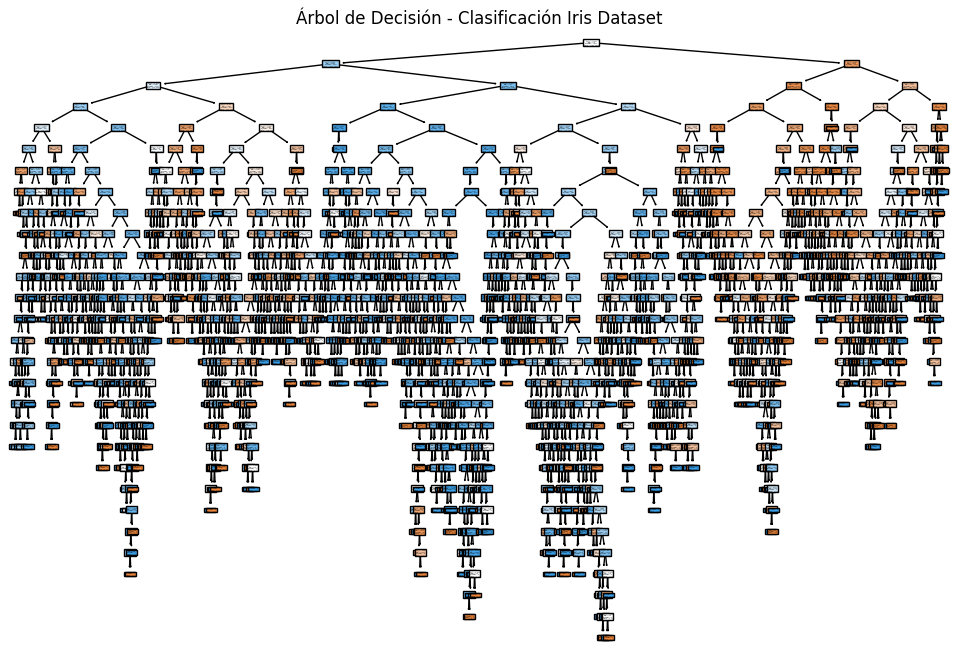

In [75]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X_train_clf, _, y_train_clf, _ = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train_clf, y_train_clf)
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True,)
plt.title("Árbol de Decisión - Clasificación Iris Dataset")
plt.show()

In [59]:
# ahora vamos con el LAB

Lab | Random Forests
For this lab, you will be using the CSV files provided in the files_for_lab folder.

Instructions
Apply the Random Forests algorithm but this time only by upscaling the data using SMOTE.
Note that since SMOTE works on numerical data only, we will first encode the categorical variables in this case.

In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd



In [2]:
# Cargar los datos
target_df = pd.read_csv(r"C:\Users\Usuari\Downloads\target.csv")


In [3]:
target_df

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [4]:
numerical_df = pd.read_csv(r"C:\Users\Usuari\Downloads\numerical.csv")

In [5]:
categorical_df = pd.read_csv(r"C:\Users\Usuari\Downloads\categorical.csv")

In [6]:
# Combinar datos numéricos y categóricos
data = pd.concat([numerical_df, categorical_df], axis=1)

In [7]:
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0,60.000000,5,9,0,0,39,34,18,10,...,37,12,92,8,94,2,95,12,89,11
1,1,46.000000,6,9,16,0,15,55,11,6,...,52,2,93,10,95,12,95,12,93,10
2,1,61.611649,3,1,2,0,20,29,33,6,...,0,2,91,11,92,7,95,12,90,1
3,0,70.000000,1,4,2,0,23,14,31,3,...,28,1,87,11,94,11,95,12,87,2
4,0,78.000000,3,2,60,1,28,9,53,26,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,2,96,2,96,2,96,2,96,2
95408,1,48.000000,7,9,1,0,31,43,19,4,...,50,1,96,3,96,3,96,3,96,3
95409,1,60.000000,5,9,0,0,18,46,20,7,...,38,1,96,3,95,1,96,10,94,10
95410,0,58.000000,7,9,0,0,28,35,20,9,...,40,5,90,11,96,8,97,1,86,12


In [8]:
# Codificar variables categóricas
cat_cols = categorical_df.columns
num_cols = numerical_df.columns

In [9]:
# Aplicar codificación one-hot a las variables categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(categorical_df)

In [10]:
# Obtener nombres de columnas para las variables categóricas codificadas
encoded_columns = encoder.get_feature_names_out(categorical_df.columns)

In [11]:
# Convertir a DataFrame y unir con datos numéricos
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoded_columns)
data_encoded = pd.concat([numerical_df, encoded_categorical_df], axis=1)

In [12]:

# Separar características (X) y la variable objetivo (y)
X = data_encoded
y = target_df['TARGET_B']

In [13]:
# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [14]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


In [19]:
# Inicializar y entrenar el modelo de Bosques Aleatorios
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt

In [20]:
# Predecir sobre los datos de prueba
y_pred = rf_model.predict(X_test)

Cálculo de importancias

In [21]:
importancias = rf_model.feature_importances_

In [22]:
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

In [23]:
feature_names = list(X.columns.values)
# [f"feature {i}" for i in range(X.shape[1])]

In [24]:
importancias_serie = pd.Series(importancias, index=feature_names)

In [25]:
top_features = importancias_serie.sort_values(ascending=False)[:20]

In [26]:
std_serie = pd.Series(std, index=feature_names)
top_std = std_serie[top_features.index]

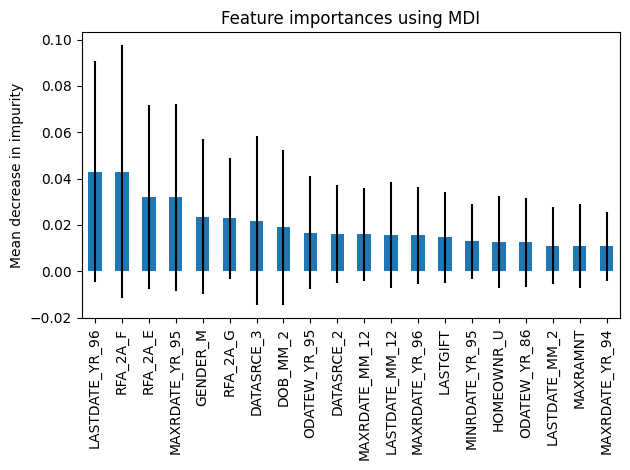

In [27]:
forest_importances = pd.Series(top_features, index=top_features.index)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=top_std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X[top_features.index], y, test_size=0.2, random_state=42)


In [29]:
# Inicializar y entrenar el modelo de Bosques Aleatorios
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = rf_model.predict(X_test)

In [31]:

# Evaluar el modelo
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[17973   132]
 [  967    11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     18105
           1       0.08      0.01      0.02       978

    accuracy                           0.94     19083
   macro avg       0.51      0.50      0.49     19083
weighted avg       0.90      0.94      0.92     19083


Accuracy Score: 0.9424094744012996


In [32]:
from sklearn.pipeline import Pipeline

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score

In [36]:
# Aplicar Validación Cruzada
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy', verbose = 5)

[CV] END ................................ score: (test=0.943) total time=   7.3s
[CV] END ................................ score: (test=0.941) total time=   6.7s
[CV] END ................................ score: (test=0.942) total time=   8.5s
[CV] END ................................ score: (test=0.942) total time=   6.5s
[CV] END ................................ score: (test=0.944) total time=   6.8s


In [37]:
cv_scores

array([0.94294511, 0.94137299, 0.94176602, 0.94176602, 0.94366197])

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [44]:
X= X[top_features.index]
# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


Optimización de hiperparámetros

In [47]:
model = DecisionTreeClassifier(random_state=42)

# Definir la parrilla de hiperparámetros

param_dist = {'max_depth': [1, 2, 3, 4, 5],'min_samples_split': np.arange(100, 500, 100), 'min_samples_leaf': np.arange(100, 500, 100), 'criterion': ['gini', 'entropy']}

# Configurar RandomizedSearchCV

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Ajustar el modelo

random_search.fit(X_train, y_train) 
# Mejor combinación de hiperparámetros

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

# Evaluar el modelo en el conjunto de prueba

y_pred = random_search.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


Best parameters found:  {'min_samples_split': 300, 'min_samples_leaf': 100, 'max_depth': 5, 'criterion': 'gini'}
Best cross-validation score: 0.65
Accuracy on test set: 64.76%


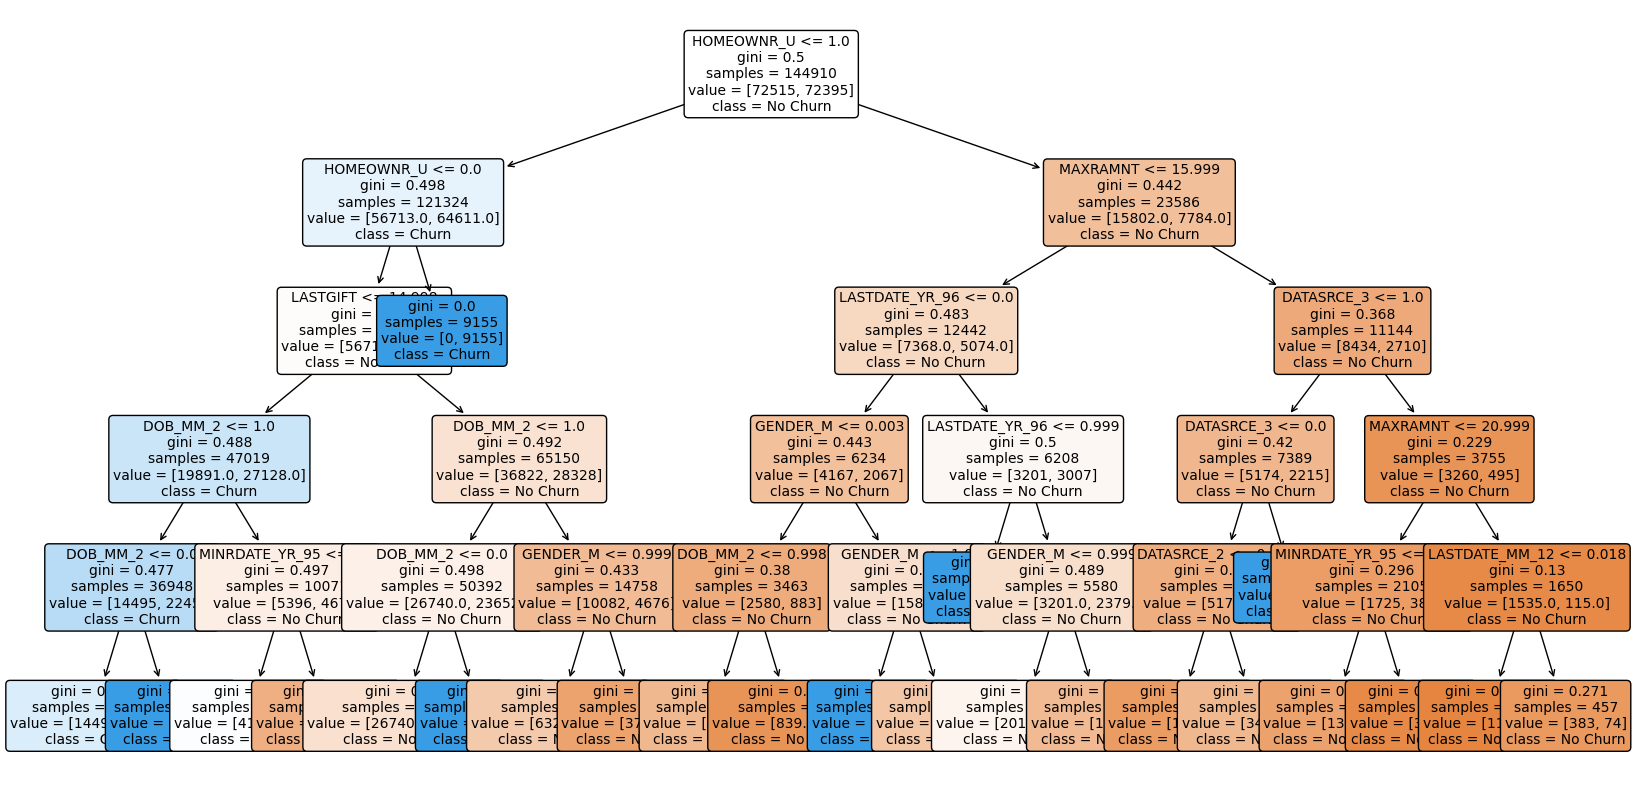

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Definir el modelo con los mejores hiperparámetros
best_model = DecisionTreeClassifier(
    min_samples_split=random_search.best_params_['min_samples_split'],
    min_samples_leaf=random_search.best_params_['min_samples_leaf'],
    max_depth=random_search.best_params_['max_depth'],
    criterion=random_search.best_params_['criterion'],
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
best_model.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(20,10)) 

# Ajustar el tamaño de la figura
plot_tree(best_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True, fontsize=10)
plt.show()

### Interpretación del Árbol ###

Raíz del Árbol (Nivel 0):

El primer nodo (raíz) muestra la primera división basada en la característica más importante. Esto puede ser algo como "tenure <= 12.5". Si esta condición es verdadera, el modelo sigue por el lado izquierdo del árbol; de lo contrario, sigue por el lado derecho.

Nodos Intermedios (Niveles 1 y 2):

Cada nodo intermedio representa una división basada en otra característica. Estas divisiones continúan hasta alcanzar la profundidad máxima especificada (3 en este caso).

Hojas del Árbol (Nivel 3):

Las hojas representan las decisiones finales del modelo. Cada hoja tiene una proporción de clases (No Churn y Churn) y predice la clase con la mayor proporción de muestras.

Información en Cada Nodo:

Gini: El índice de Gini en ese nodo, que mide la pureza de las muestras en el nodo. Un valor de 0 significa que todas las muestras pertenecen a una sola clase.
Samples: El número de muestras que llegan a ese nodo.
Value: La distribución de clases en ese nodo (por ejemplo, [50, 50] para un nodo con 50 muestras de cada clase).
Class: La clase predicha para ese nodo (basada en la mayoría de las muestras).

Hiperparámetros Óptimos: Has encontrado una buena combinación de hiperparámetros que balancean la complejidad del modelo y su capacidad para generalizar.

Rendimiento del Modelo: El modelo muestra un alto rendimiento tanto en la validación cruzada como en el conjunto de prueba, sugiriendo que es capaz de generalizar bien a nuevos datos.

Árbol de Decisión: La visualización del árbol te ayuda a entender cómo el modelo toma decisiones basadas en las características de los datos. Cada división en el árbol representa una decisión basada en una característica específica, y el árbol completo muestra el proceso de decisión completo del modelo.